In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
plt.rcParams["figure.figsize"] = (25,10)

plt.rcParams.update({'font.size': 22})

colors='bgrykcm'
symbol='*-+^'

In [2]:
import utils
import utils_exponential_grid
from utils_exponential_grid import predictor_corrector_radial_shcrodinger_integrator_exponential_grid as integrator
from utils_exponential_grid import normlize_function_exponential_grid as normalizer


In [3]:
from Atomic_Like_Potential import V_eff_testing as V_eff
def rk4(grid, w10,w20, kwargs):
    E= kwargs['E']
    #h= kwargs['delta_x']
    #h_arra= np.array(grid[1:]) - np.array(grid[:-1])
    h_arra= np.array(grid[:-1]) - np.array(grid[1:])
    Z= kwargs['Z']
    l= kwargs['l']

    w1=[w10]
    w2=[w20]

    for i,ri in enumerate(grid[:-1]):
        h=0.01#h_arra[i]
        k1=4*[0.0]
        k2=4*[0.0]
        vj0= V_eff(ri,Z,l,E)
        vj12= V_eff(ri + 0.5*h,Z,l,E)
        vj3= V_eff(ri+h,Z,l,E)
        for j in range(4):
            
            if j == 0:
                k1[j]=h*(w2[i])
                k2[j]= h*vj0*w1[i]
            elif j == 1 or j == 2:
                k1[j]=h*(w2[i] + 0.5*k2[j-1])
                k2[j]= h*vj12*(w1[i] + 0.5*k1[j-1])
            elif j == 3:
                k1[j]=h*(w2[i] + k2[j-1])
                k2[j]= h*vj3*(w1[i] + k1[j-1])
        w1.append( w1[i] + (1.0/6.0)*(k1[0] + 2.0*k1[1] + 2.0*k1[2] + k1[3]))
        w2.append( w2[i] + (1.0/6.0)*(k2[0] + 2.0*k2[1] + 2.0*k2[2] + k2[3]))
    return w1

In [4]:
#debuging starts

In [5]:
kwargs={'r_max':10.0, 'grid_points':3000,'delta':0.0025,  
        'l':2, 'Z':1.0, 'E':-0.05418}
exp_grid= 0.001*np.flip(np.array([*range(10000)])) + 1.0e-12#utils_exponential_grid.get_exponential_grid_reverse(kwargs)

def y_func(r_n):
    return np.exp(-1.0*(r_n -5.0)**2.0)



w10= y_func(exp_grid[0])#1.0e-8#u_hydr[0]
w20= (w10 - y_func(exp_grid[1]))/(exp_grid[0] - exp_grid[1])

In [6]:
w20

-1.409362736193884e-10

In [7]:
#u_func= integrator(exp_grid, w10,w20, kwargs)
u_func= rk4(exp_grid, w10,w20, kwargs)

In [8]:
y= y_func(np.array(exp_grid))

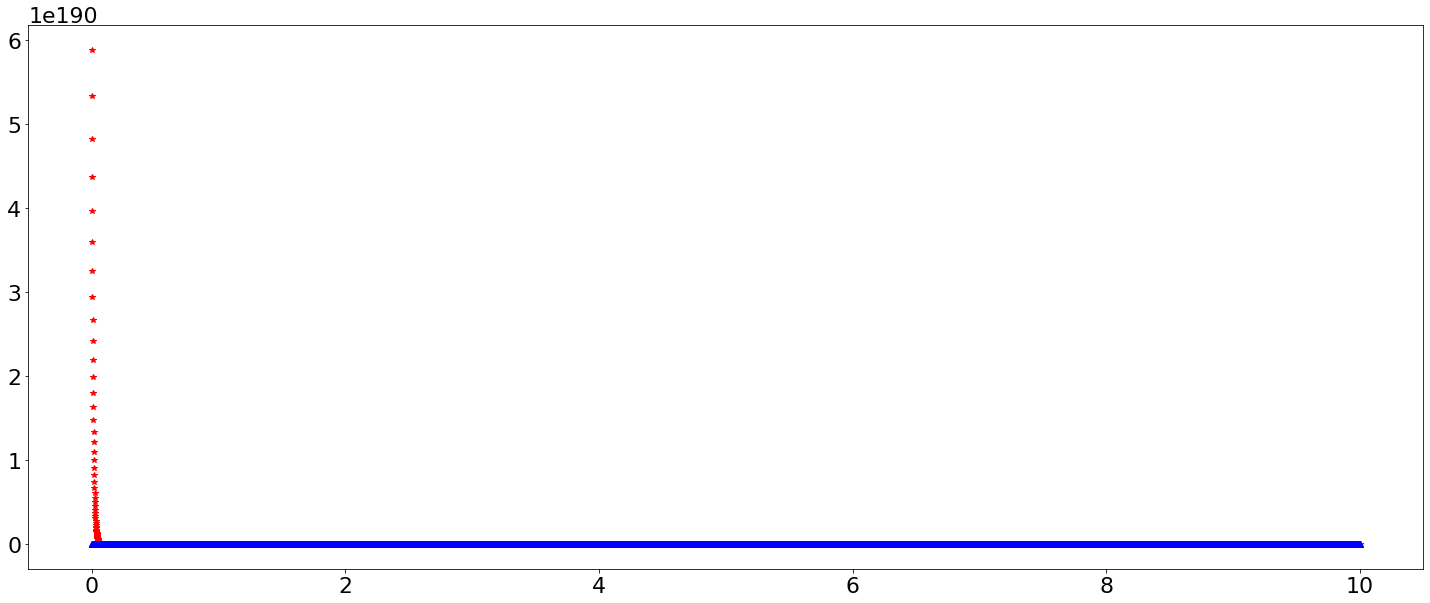

In [9]:
plt.plot(exp_grid,u_func,'r*', exp_grid,y,'b^')
plt.show()

In [10]:
L=500

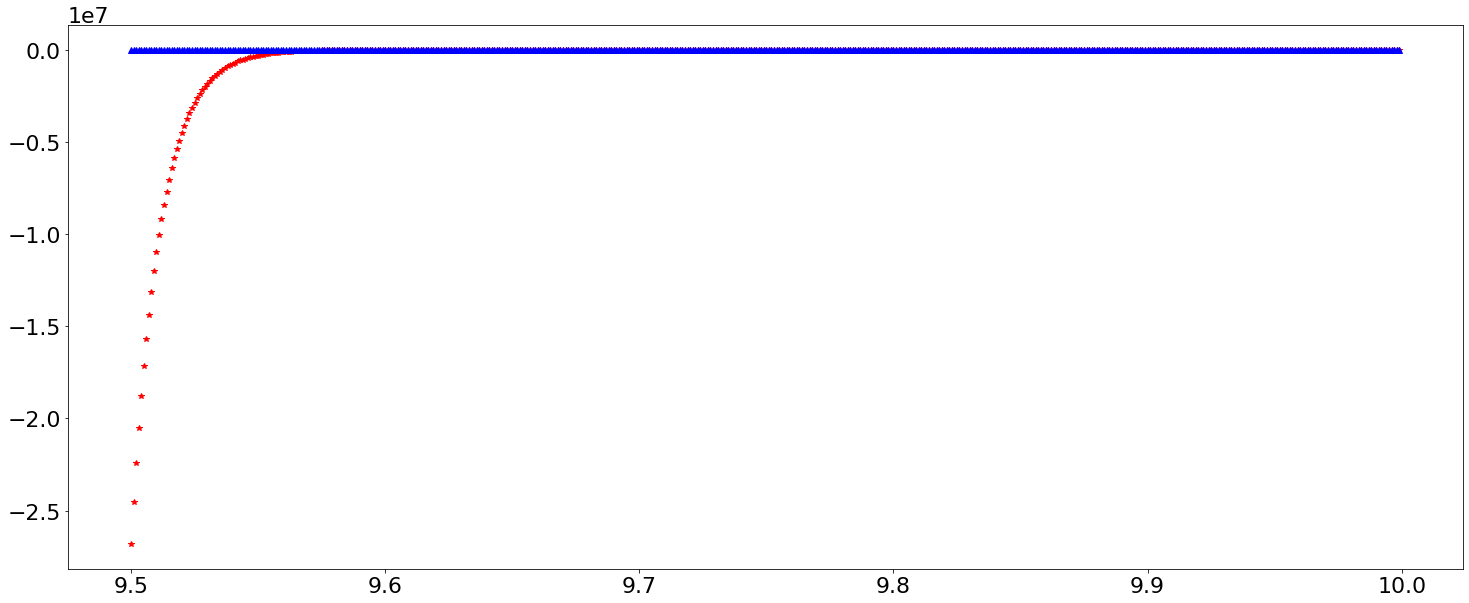

In [11]:
plt.plot(exp_grid[:L],u_func[:L],'r*', exp_grid[:L],y[:L],'b^')
plt.show()

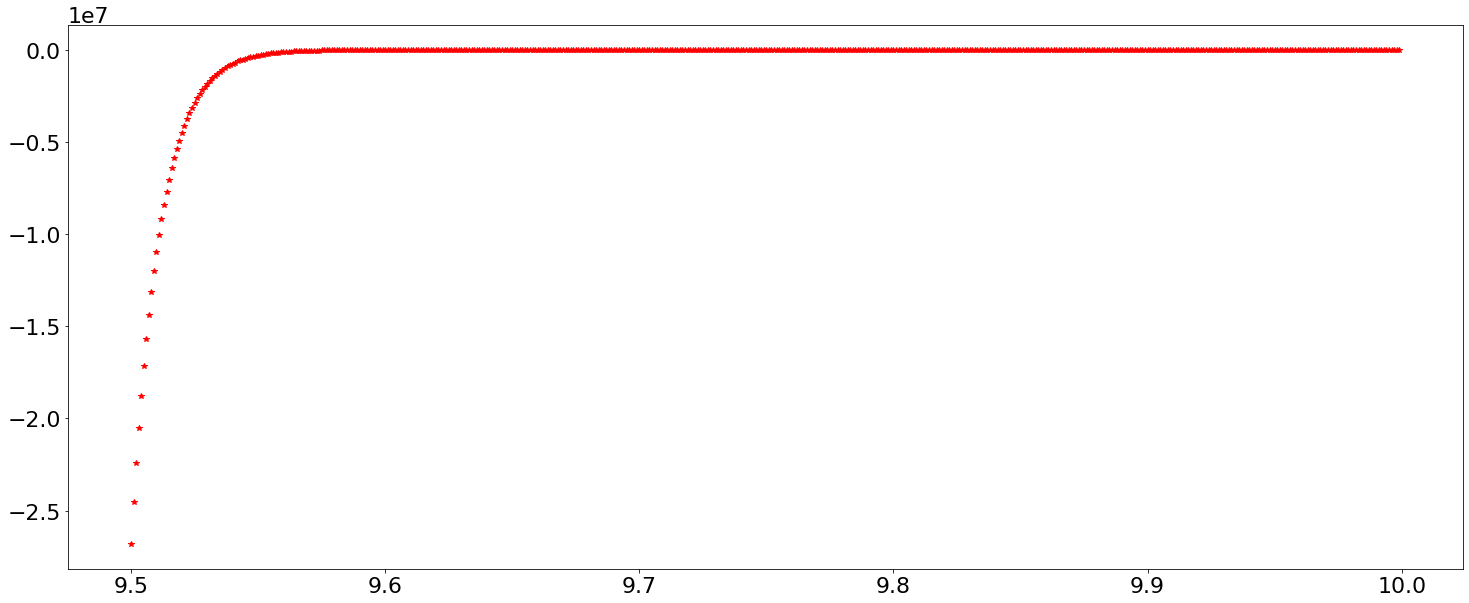

In [12]:
plt.plot(exp_grid[:L],u_func[:L],'r*')
plt.show()

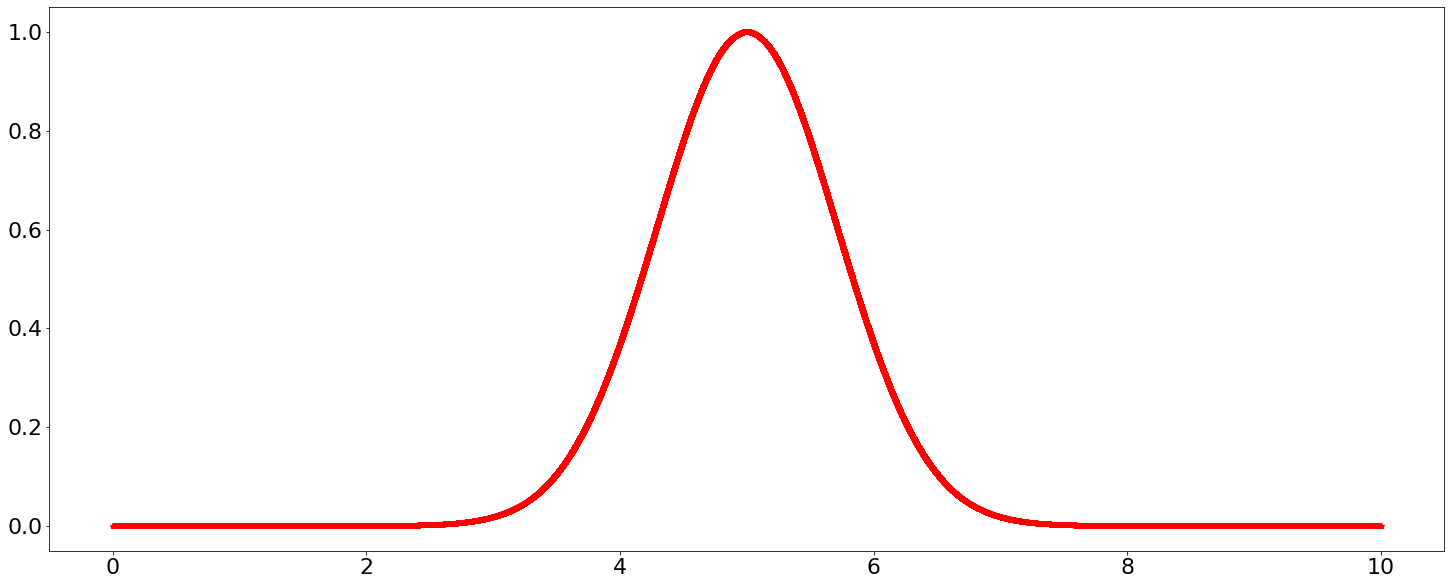

In [13]:
plt.plot(exp_grid,y,'r*')
plt.show()

In [13]:
h_arra= np.array(exp_grid[:-1]) - np.array(exp_grid[1:])

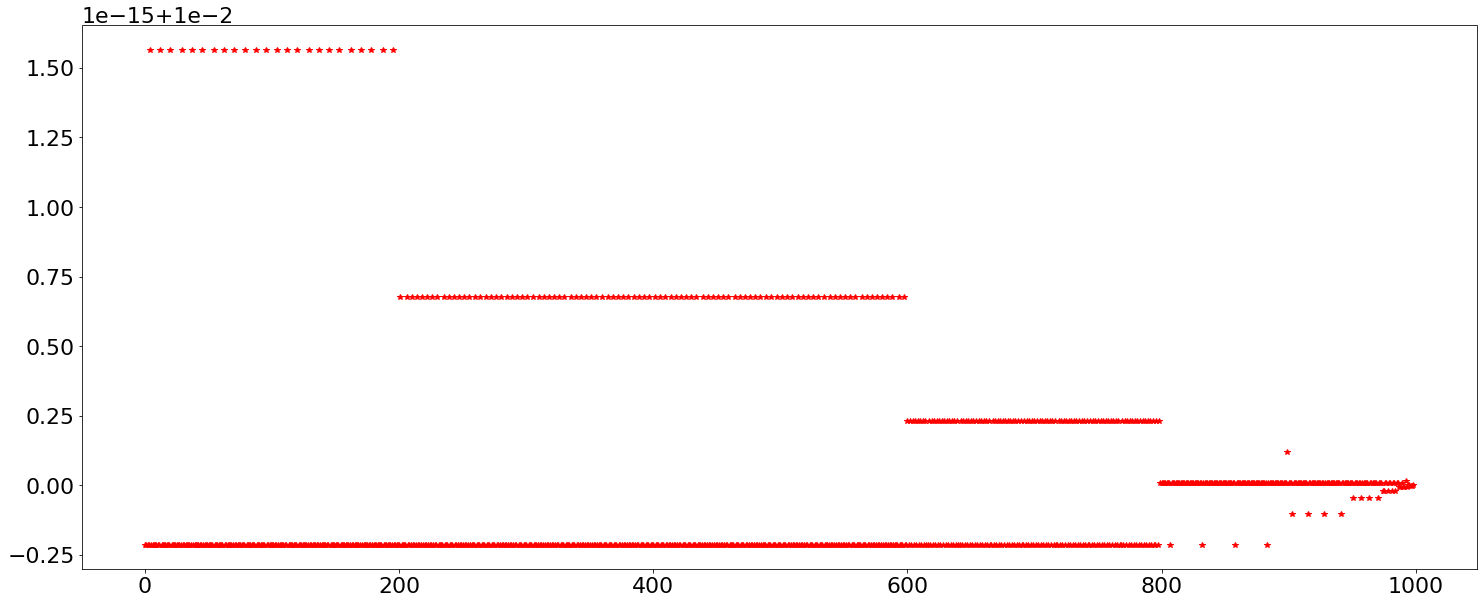

In [14]:
plt.plot([*range(len(h_arra))],h_arra,'r*')
plt.show()

In [25]:
h_arra

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.

In [ ]:
#debuging ends

In [ ]:
#testing with known answer for hydrogen start

In [7]:
u_func= utils_exponential_grid.predictor_corrector_radial_shcrodinger_integrator_exponential_grid(exp_grid, w10,w20, kwargs)
u_func_norm= utils_exponential_grid.normlize_function_exponential_grid(exp_grid, u_func)

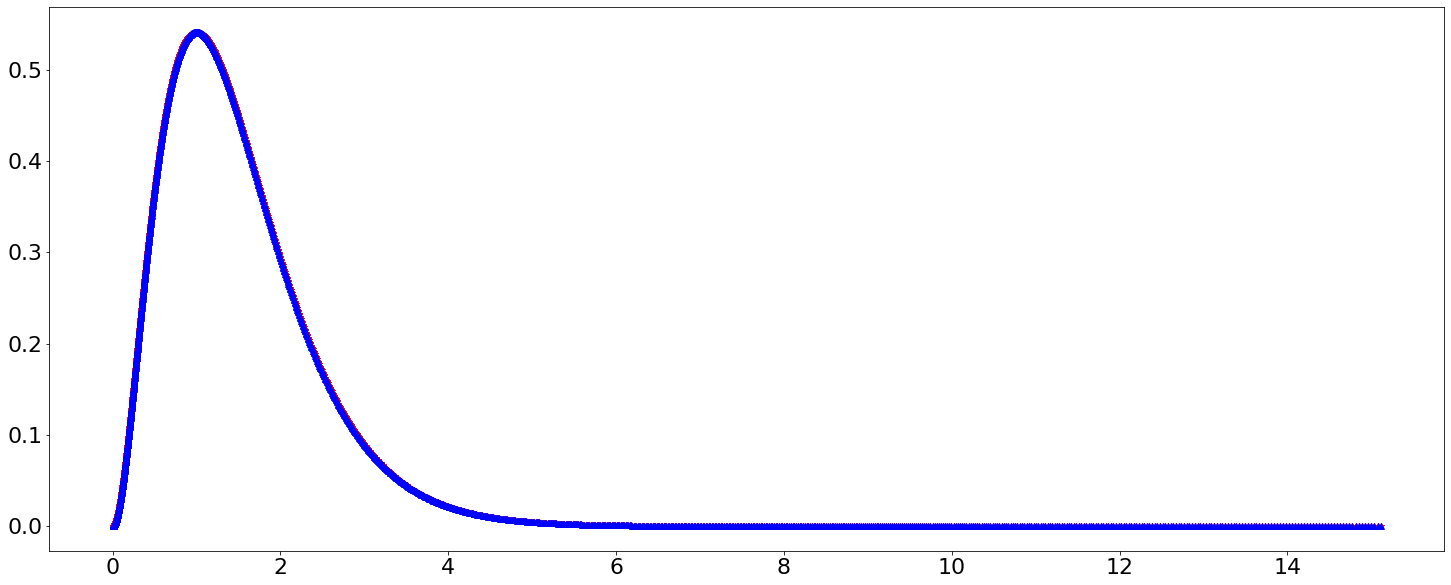

In [8]:
plt.plot(exp_grid,np.array(u_func_norm)**2,'r*', exp_grid,np.array(u_hydr_norm)**2,'b^')
plt.show()

In [ ]:
#testing with known answer for hydrogen ends